In [30]:
import pandas as pd
import FWI
import matplotlib.pyplot as plt
import numpy as np

def total_precipitation(initial_date, final_date, dmet):
    dmet_copy = dmet.copy()
    dmet_copy['hourly.time'] = pd.to_datetime(dmet_copy['hourly.time'])
    dmet_copy.set_index('hourly.time', inplace=True)
    selected_rows = dmet_copy.loc[initial_date:final_date]
    total_precipitation = selected_rows['hourly.precipitation'].sum()

    return float(total_precipitation)

In [31]:
dmet = pd.read_csv('Samples/2015/2015.csv')
start_index = 0 + 37
LAT = 40.20875
FFMCPrev = 95.732421875
DMCPrev = 72.5761489868164
DCPrev = 380.162109375


mts = {5: 31,
       6: 30,
       7: 31,
       8:31, 
       9:30, 
       10:31}

fwix_values = [None] * len(dmet)
ffmc_values = [None] * len(dmet)
dmc_values = [None] * len(dmet)
dc_values = [None] * len(dmet)
isi_values = [None] * len(dmet)
bui_values = [None] * len(dmet)

for i in range(start_index, len(dmet)):
    MONTH = (dmet.iloc[i]['hourly.time']).split('-')[1]
    DAY = (dmet.iloc[i]['hourly.time']).split('-')[2].split('T')[0]
    HOUR = (dmet.iloc[i]['hourly.time']).split('T')[1].split(':')[0]

    #print(MONTH, DAY, HOUR)

    TEMP = dmet.iloc[i]['hourly.temperature_2m']
    RH = dmet.iloc[i]['hourly.relative_humidity_2m']
    WIND = dmet.iloc[i]['hourly.wind_speed_10m']

    if(int(DAY) == 1):
        LAST_DAY = mts[int(MONTH) - 1]
        LAST_MONTH = int(MONTH) - 1

        if(int(LAST_MONTH) < 10):
            LAST_MONTH = '0' + str(int(LAST_MONTH))

        initial_date = f'2015-{LAST_MONTH}-{LAST_DAY}T{HOUR}:00'
        final_date = f'2015-{MONTH}-{DAY}T{HOUR}:00'

    elif((int(DAY) < 10) and (int(DAY) > 1)):
        id = '0' + str(int(DAY)-1)
        fd = '0' + str(int(DAY))

        initial_date = f'2015-{MONTH}-{id}T{HOUR}:00'
        final_date = f'2015-{MONTH}-{fd}T{HOUR}:00'

    else:
        id = str(int(DAY)-1)
        fd = str(int(DAY))

        initial_date = f'2015-{MONTH}-{id}T{HOUR}:00'
        final_date = f'2015-{MONTH}-{fd}T{HOUR}:00'

    
    RAIN = total_precipitation(initial_date, final_date, dmet)
    print(initial_date, final_date, str(RAIN))

    FFMCPrev = FWI.FFMC(TEMP,RH,WIND,RAIN,FFMCPrev)
    DMCPrev = FWI.DMC(TEMP,RH,RAIN,DMCPrev,LAT,int(MONTH))
    DCPrev = FWI.DC(TEMP,RAIN,DCPrev,LAT,int(MONTH))
    isi = FWI.ISI(WIND, FFMCPrev)
    bui = FWI.BUI(DMCPrev,DCPrev)
    fwix = FWI.FWI(isi, bui)

    fwix_values[i] = fwix
    ffmc_values[i] = FFMCPrev
    dmc_values[i] = DMCPrev
    dc_values[i] = DCPrev
    isi_values[i] = isi
    bui_values[i] = bui


    dmet['fwix'] = fwix_values
    dmet['ffmc'] = ffmc_values
    dmet['dmc'] = dmc_values
    dmet['dc'] = dc_values
    dmet['isi'] = isi_values
    dmet['bui'] = bui_values


dmet.to_csv('Samples/2015/2015byHourFWIX.csv', index=False)

2015-06-20T13:00 2015-06-21T13:00 0.0
2015-06-20T14:00 2015-06-21T14:00 0.0
2015-06-20T15:00 2015-06-21T15:00 0.0
2015-06-20T16:00 2015-06-21T16:00 0.0
2015-06-20T17:00 2015-06-21T17:00 0.0
2015-06-20T18:00 2015-06-21T18:00 0.0
2015-06-20T19:00 2015-06-21T19:00 0.0
2015-06-20T20:00 2015-06-21T20:00 0.0
2015-06-20T21:00 2015-06-21T21:00 0.0
2015-06-20T22:00 2015-06-21T22:00 0.0
2015-06-20T23:00 2015-06-21T23:00 0.0
2015-06-21T00:00 2015-06-22T00:00 0.0
2015-06-21T01:00 2015-06-22T01:00 0.0
2015-06-21T02:00 2015-06-22T02:00 0.0
2015-06-21T03:00 2015-06-22T03:00 0.0
2015-06-21T04:00 2015-06-22T04:00 0.0
2015-06-21T05:00 2015-06-22T05:00 0.0
2015-06-21T06:00 2015-06-22T06:00 0.0
2015-06-21T07:00 2015-06-22T07:00 0.0
2015-06-21T08:00 2015-06-22T08:00 0.0
2015-06-21T09:00 2015-06-22T09:00 0.0
2015-06-21T10:00 2015-06-22T10:00 0.0
2015-06-21T11:00 2015-06-22T11:00 0.0
2015-06-21T12:00 2015-06-22T12:00 0.0
2015-06-21T13:00 2015-06-22T13:00 0.0
2015-06-21T14:00 2015-06-22T14:00 0.0
2015-06-21T1

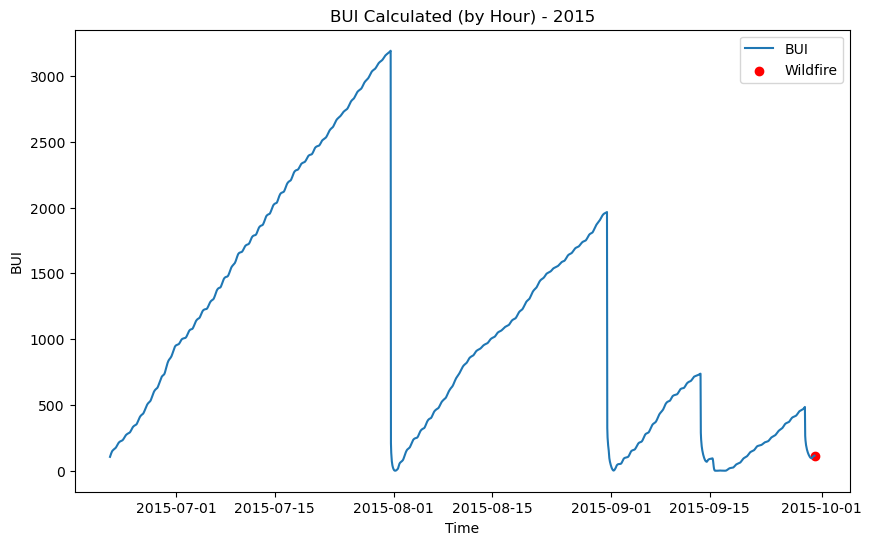

In [37]:
ofmd = pd.read_csv('Samples/2015/2015byHourFWIX.csv')

#fwix,ffmc,dmc,dc,isi,bui

ofmd['hourly.time'] = pd.to_datetime(ofmd['hourly.time'])

metvar = "BUI"
__year = 2015

plt.figure(figsize=(10,6))
plt.plot(np.array(ofmd['hourly.time']), np.array(ofmd['bui']), label=f'{metvar}')
plt.scatter(np.array(ofmd['hourly.time'].iloc[-1]), np.array(ofmd['bui'].iloc[-1]), color='red', label='Wildfire')
plt.xlabel('Time')
plt.ylabel(f'{metvar}')
plt.title(f'{metvar} Calculated (by Hour) - {__year}')
plt.legend()
plt.savefig(f'{__year}Calc{metvar}12.png', dpi=300)
plt.show()

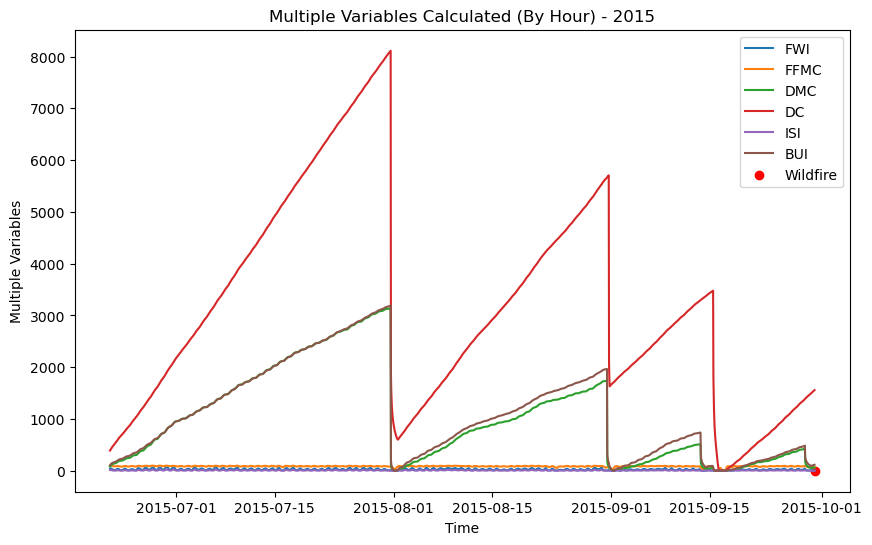

In [39]:
ofmd = pd.read_csv('Samples/2015/2015byHourFWIX.csv')

ofmd['hourly.time'] = pd.to_datetime(ofmd['hourly.time'])

metvar = "Multiple Variables"
__year = 2015

plt.figure(figsize=(10,6))
plt.plot(np.array(ofmd['hourly.time']), np.array(ofmd['fwix']), label=f'FWI')
plt.plot(np.array(ofmd['hourly.time']), np.array(ofmd['ffmc']), label=f'FFMC')
plt.plot(np.array(ofmd['hourly.time']), np.array(ofmd['dmc']), label=f'DMC')
plt.plot(np.array(ofmd['hourly.time']), np.array(ofmd['dc']), label=f'DC')
plt.plot(np.array(ofmd['hourly.time']), np.array(ofmd['isi']), label=f'ISI')
plt.plot(np.array(ofmd['hourly.time']), np.array(ofmd['bui']), label=f'BUI')

plt.scatter(np.array(ofmd['hourly.time'].iloc[-1]), np.array(ofmd['fwix'].iloc[-1]), color='red', label='Wildfire')
plt.xlabel('Time')
plt.ylabel(f'{metvar}')
plt.title(f'{metvar} Calculated (By Hour) - {__year}')
plt.legend()
plt.savefig(f'{__year}Calc{metvar}12.png', dpi=300)
plt.show()